## WeatherPy

#### Maria Barrera -- 02/07/2021

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [4]:
# display cities
cities

['san patricio',
 'ambatofinandrahana',
 'westpunt',
 'rikitea',
 'tiksi',
 'sarh',
 'ushuaia',
 'castro',
 'georgetown',
 'yar-sale',
 'kodiak',
 'busselton',
 'port lincoln',
 'zhangzhou',
 'codrington',
 'hermanus',
 'kruisfontein',
 'amudat',
 'new norfolk',
 'thompson',
 'east wenatchee bench',
 'senta',
 'carnarvon',
 'jamestown',
 'lorengau',
 'yellowknife',
 'ust-koksa',
 'bluff',
 'bonavista',
 'omsukchan',
 'kungurtug',
 'lagoa',
 'zyryanka',
 'hithadhoo',
 'hilo',
 'dikson',
 'faanui',
 'ninghai',
 'port augusta',
 'rincon',
 'gualeguay',
 'ixtapa',
 'aklavik',
 'cherskiy',
 'butaritari',
 'homer',
 'la ronge',
 'faya',
 'albany',
 'nuuk',
 'akdepe',
 'amderma',
 'poronaysk',
 'barentsburg',
 'tuktoyaktuk',
 'mogadishu',
 'lompoc',
 'porto belo',
 'kavieng',
 'longyearbyen',
 'bandarbeyla',
 'svetlogorsk',
 'canora',
 'fujin',
 'tostedt',
 'saleaula',
 'kamenskoye',
 'torbay',
 'kapaa',
 'vaini',
 'itaberai',
 'klaksvik',
 'mar del plata',
 'talara',
 'danielskuil',
 'nizhne

In [5]:
# display on 10 cities
# cities[:10]

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
### Perform API Calls

####  TEMP for testing only:
city_name= 'yulara'

url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [7]:
url=(f'https://api.openweathermap.org/data/2.5/weather?q={city_name}&appid={weather_api_key}')
url

'https://api.openweathermap.org/data/2.5/weather?q=yulara&appid=d64f2833aec28689f5af36a76f9fa491'

In [8]:
# Pretty print JSON for weather
response = requests.get(url).json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -25.2406,
        "lon": 130.9889
    },
    "dt": 1612760969,
    "id": 6355222,
    "main": {
        "feels_like": 304.59,
        "humidity": 16,
        "pressure": 1007,
        "temp": 308.15,
        "temp_max": 308.15,
        "temp_min": 308.15
    },
    "name": "Yulara",
    "sys": {
        "country": "AU",
        "id": 9487,
        "sunrise": 1612731439,
        "sunset": 1612778592,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 60,
        "speed": 3.6
    }
}


In [9]:
# reference only -- # List for holding lat_lngs and cities
# cities = []

lat_lngs = []

for city in cities:
    url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
    response = requests.get(url).json()
    
    try:
        lat = response["coord"]["lat"]
        long = response["coord"]["lon"]

        lat_lng = {'latitude':lat,
                   'longitude':long}

        print("lat", lat, "long", long)
    except:
        continue

    lat_lngs.append(lat_lng)
    
lat_lngs

lat 28.017 long -97.5169
lat -20.55 long 46.8
lat -23.1203 long -134.9692
lat 71.6872 long 128.8694
lat 9.1429 long 18.3923
lat -54.8 long -68.3
lat -24.7911 long -50.0119
lat 5.4112 long 100.3354
lat 66.8333 long 70.8333
lat 57.79 long -152.4072
lat -33.65 long 115.3333
lat -34.7333 long 135.8667
lat 24.5133 long 117.6556
lat -38.2667 long 141.9667
lat -34.4187 long 19.2345
lat -34.0033 long 24.7314
lat 1.95 long 34.95
lat -42.7826 long 147.0587
lat 55.7435 long -97.8558
lat 47.4257 long -120.2812
lat 45.9275 long 20.0772
lat -24.8667 long 113.6333
lat 42.097 long -79.2353
lat -2.0226 long 147.2712
lat 62.456 long -114.3525
lat 50.2696 long 85.6108
lat -46.6 long 168.3333
lat 48.6499 long -53.1147
lat 62.5333 long 155.8
lat 50.5994 long 97.5228
lat 39.05 long -27.9833
lat 65.75 long 150.85
lat -0.6 long 73.0833
lat 19.7297 long -155.09
lat 73.5069 long 80.5464
lat -16.4833 long -151.75
lat 29.2892 long 121.4247
lat -32.5 long 137.7667
lat 32.296 long -81.2354
lat -33.1416 long -59.309

lat 55.4833 long 9.15
lat 38.08 long 46.2919
lat 60.7522 long -137.5108
lat 57.1576 long 60.5698
lat -5.9475 long 29.1947
lat 51.55 long -9.2667
lat -33.4569 long -70.6483
lat -20.3428 long 57.7575
lat -45.5752 long -72.0662
lat 42.2506 long -75.833
lat 22.8779 long 116.067
lat 11.7361 long 41.0853
lat -32.25 long 148.6167
lat 37.15 long 122.3833
lat 13.9511 long 101.7177
lat 44.4167 long 11.9833
lat 55.699 long 36.1952
lat 65.7 long 82.4667
lat -34.0363 long 23.0471
lat 40.1629 long -8.3327
lat 63.4427 long -20.2734
lat 39.8386 long 69.5306
lat -10.0681 long -78.1522
lat -3.5534 long 143.6268
lat -17.8 long -63.1667
lat -27.2667 long 28.4833
lat 11.5544 long -1.7736
lat -18.7667 long 46.0333
lat 35.8333 long 66.1667
lat -31.4333 long 152.9167
lat 5.203 long 96.7009
lat 54.4333 long 113.6
lat 61.0064 long 36.4481
lat -1.8 long -79.3333
lat -8.4667 long 140.3333
lat 35.7333 long 140.8333
lat 37.4381 long -4.1952
lat -23.1333 long 150.7333
lat 8.5 long -82.4333
lat -19.55 long 169.2667
l

[{'latitude': 28.017, 'longitude': -97.5169},
 {'latitude': -20.55, 'longitude': 46.8},
 {'latitude': -23.1203, 'longitude': -134.9692},
 {'latitude': 71.6872, 'longitude': 128.8694},
 {'latitude': 9.1429, 'longitude': 18.3923},
 {'latitude': -54.8, 'longitude': -68.3},
 {'latitude': -24.7911, 'longitude': -50.0119},
 {'latitude': 5.4112, 'longitude': 100.3354},
 {'latitude': 66.8333, 'longitude': 70.8333},
 {'latitude': 57.79, 'longitude': -152.4072},
 {'latitude': -33.65, 'longitude': 115.3333},
 {'latitude': -34.7333, 'longitude': 135.8667},
 {'latitude': 24.5133, 'longitude': 117.6556},
 {'latitude': -38.2667, 'longitude': 141.9667},
 {'latitude': -34.4187, 'longitude': 19.2345},
 {'latitude': -34.0033, 'longitude': 24.7314},
 {'latitude': 1.95, 'longitude': 34.95},
 {'latitude': -42.7826, 'longitude': 147.0587},
 {'latitude': 55.7435, 'longitude': -97.8558},
 {'latitude': 47.4257, 'longitude': -120.2812},
 {'latitude': 45.9275, 'longitude': 20.0772},
 {'latitude': -24.8667, 'longi

In [10]:
# Display 10 items for lat / long
lat_lngs[:10]

[{'latitude': 28.017, 'longitude': -97.5169},
 {'latitude': -20.55, 'longitude': 46.8},
 {'latitude': -23.1203, 'longitude': -134.9692},
 {'latitude': 71.6872, 'longitude': 128.8694},
 {'latitude': 9.1429, 'longitude': 18.3923},
 {'latitude': -54.8, 'longitude': -68.3},
 {'latitude': -24.7911, 'longitude': -50.0119},
 {'latitude': 5.4112, 'longitude': 100.3354},
 {'latitude': 66.8333, 'longitude': 70.8333},
 {'latitude': 57.79, 'longitude': -152.4072}]

In [11]:
# display 10 cities
cities[:10]

['san patricio',
 'ambatofinandrahana',
 'westpunt',
 'rikitea',
 'tiksi',
 'sarh',
 'ushuaia',
 'castro',
 'georgetown',
 'yar-sale']

In [12]:
# export the city data to a csv file
import csv

# Specify the file to write to
output_path = "output_data/cities_file.csv"

In [13]:
# full run of cities

# Open the file using "write" mode. Specify the variable to hold the contents
with open(output_path, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 
                        'Max Temp', 'Wind Speed'])
    
    # read cities file, get all the values from the API response and write rows to the cities_file
    
    for city in cities:
        url=(f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}')
        response = requests.get(url).json()
        try:
            city_id = response["sys"]["id"]
            cloudiness = response["clouds"]["all"]
            country = response["sys"]["country"]
            date = response["dt"]
            humidity = response["main"]["humidity"]
            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = response["main"]["temp_max"]
            wind_speed = response["wind"]["speed"]
            
            # Display city data
            print(city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed)
            
            # write to excel output file
            csvwriter.writerow([city_id, city, cloudiness, country, date, humidity, lat, long, max_temp, wind_speed])
            
        except:
            continue
            

3705 san patricio 40 US 1612760651 94 28.017 -97.5169 289.15 4.12
2216 sarh 0 TD 1612760971 23 9.1429 18.3923 295.15 2.06
8303 ushuaia 75 AR 1612761222 76 -54.8 -68.3 284.15 1.03
9429 georgetown 20 MY 1612761223 51 5.4112 100.3354 305.15 2.57
7668 kodiak 1 US 1612761103 74 57.79 -152.4072 269.15 3.09
2008303 busselton 94 AU 1612761224 93 -33.65 115.3333 292.59 2.68
9649 zhangzhou 0 CN 1612760974 50 24.5133 117.6556 297.15 8
2006131 hermanus 39 ZA 1612761182 92 -34.4187 19.2345 287.59 2.59
2035063 kruisfontein 69 ZA 1612761226 81 -34.0033 24.7314 292.04 4.87
2031307 new norfolk 90 AU 1612761227 52 -42.7826 147.0587 293.15 1.34
935 thompson 75 CA 1612761227 68 55.7435 -97.8558 240.15 6.17
3917 east wenatchee bench 90 US 1612760636 80 47.4257 -120.2812 275.93 3.09
9505 carnarvon 75 AU 1612760638 100 -24.8667 113.6333 303.15 6.69
4588 jamestown 90 US 1612761127 85 42.097 -79.2353 262.04 2.06
1007 yellowknife 75 CA 1612761123 67 62.456 -114.3525 235.37 4.12
719 bonavista 60 CA 1612761231 74

990 smithers 1 CA 1612761091 92 54.7804 -127.1743 258.15 1.54
6218 mayo 1 US 1612761339 51 38.8876 -76.5119 272.15 3.6
9483 alice springs 71 AU 1612761124 16 -23.7 133.8833 309.15 8.23
2008548 portland 95 US 1612760924 80 45.5234 -122.6762 279.82 0.89
6845 gat 0 IL 1612761341 93 31.61 34.7642 284.82 0.51
9522 geraldton 75 AU 1612761267 57 -28.7667 114.6 298.15 7.2
75281 dunedin 95 NZ 1612761343 88 -45.8742 170.5036 289.26 0.45
894 kenora 1 CA 1612761095 68 49.8167 -94.4337 240.15 3.09
2001932 atherton 86 GB 1612760850 63 53.5237 -2.4935 274.82 1.79
4674 north platte 20 US 1612760932 71 41.1239 -100.7654 254.15 2.57
3618 fort oglethorpe 1 US 1612761097 86 34.949 -85.2569 273.15 1.54
4127 fortuna 90 US 1612761345 93 40.5982 -124.1573 280.15 2.15
9014 komsomolskiy 67 UZ 1612761346 65 40.4272 71.7189 280.15 3.09
2482 nouakchott 0 MR 1612761099 36 18.0858 -15.9785 288.15 4.63
9225 yanam 50 IN 1612761099 54 16.7333 82.2167 300.15 3.09
2131 dzaoudzi 75 YT 1612761100 89 -12.7887 45.2699 300.15

7537 dubai 0 AE 1612760847 64 25.2582 55.3047 295.15 1.54
8070 tateyama 40 JP 1612761191 57 34.9833 139.8667 283.71 5.66
2020742 margate 100 GB 1612761191 80 51.3813 1.3862 273.15 5.36
2208 quelimane 75 MZ 1612761193 94 -17.8786 36.8883 299.15 1.14
90 grindavik 0 IS 1612761193 75 63.8424 -22.4338 274.15 6.17
8321 ipixuna 0 BR 1612761194 83 -1.7625 -48.8043 298.15 1.03
6900 areosa 40 PT 1612761196 93 41.7178 -8.8571 284.15 1.54
6608 lithakia 75 GR 1612761197 51 37.7167 20.8333 290.15 5.14
3581 rodeo 1 US 1612761048 66 38.033 -122.2669 286.48 2.06
9639 baiyin 0 CN 1612761200 17 36.5583 104.2081 276.15 2
7217 quepos 20 CR 1612761201 83 9.4236 -84.1652 294.15 1.54
8772 bathsheba 20 BB 1612761201 65 13.2167 -59.5167 298.15 7.72
2517 marsa matruh 0 EG 1612761202 82 31.3525 27.2453 285.15 4.12
5769 laguna 1 US 1612761203 71 38.421 -121.4238 284.82 1.54
8137 itoman 20 JP 1612761445 52 26.1247 127.6694 294.15 9.26
73730 aljezur 97 PT 1612761203 100 37.3191 -8.8033 285.37 1.79
1632 hammerfest 75

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# Cities data file
cities_data_path = "output_data/cities_file.csv"
cities_data_path

# read the cities file and put in a pandas dataframe
cities_df = pd.read_csv(cities_data_path)
cities_df.head()

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3705,san patricio,40,US,1612760651,94,28.0170,-97.5169,289.15,4.12
1,2216,sarh,0,TD,1612760971,23,9.1429,18.3923,295.15,2.06
2,8303,ushuaia,75,AR,1612761222,76,-54.8000,-68.3000,284.15,1.03
3,9429,georgetown,20,MY,1612761223,51,5.4112,100.3354,305.15,2.57
4,7668,kodiak,1,US,1612761103,74,57.7900,-152.4072,269.15,3.09


In [34]:
#  temperature conversion & column update

new_df = cities_df

# for testing only ---------------
# maxtemp = 294.26
# temp_f = (maxtemp - 273.15) * 9/5 +32
# temp_f
# --------------------------------

for ind in new_df.index: 
    maxtemp = new_df['Max Temp'][ind]
    temp_f = (maxtemp - 273.15) * 9/5 +32
    new_df['Max Temp'][ind] = temp_f
    
    # for testing only
    #print(temp_f)
    #print(new_df['Max Temp'][ind], ind) 
    
new_df.head()

<ipython-input-34-8d8f6c037661>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Max Temp'][ind] = temp_f


,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3705,san patricio,40,US,1612760651,94,28.0170,-97.5169,60.8,4.12
1,2216,sarh,0,TD,1612760971,23,9.1429,18.3923,71.6,2.06
2,8303,ushuaia,75,AR,1612761222,76,-54.8000,-68.3000,51.8,1.03
3,9429,georgetown,20,MY,1612761223,51,5.4112,100.3354,89.6,2.57
4,7668,kodiak,1,US,1612761103,74,57.7900,-152.4072,24.8,3.09


In [43]:
#testing
#new_df[.to_datetime('1612595343', format='%Y%m%d', errors='ignore')
       
#df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d') 
#new_df['Date'] = pd.to_datetime(new_df['Date'], format='%y%m%d', errors='ignore')

#new_df['Date'] = pd.to_datetime(new_df['Date'][0], format='%y%m%d', errors='ignore')
#new_df['Date'] = pd.to_datetime(1612595343, format='%y%m%d', errors='ignore')
#new_df       

#cities_df['Date'][0].Date(levels(data$x), format="%d.%m.%Y")
#cities_df['Date'][0].Date(1612595343, format="%d.%m.%Y")
#x=cities_df['Date'][0]
#x
date='04/01/20'

In [36]:
# create a subset -- for testing only
subset_cities_df = cities_df[["Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
subset_cities_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,28.0170,-97.5169,60.8,94,40,4.12,US,1612760651
1,9.1429,18.3923,71.6,23,0,2.06,TD,1612760971
2,-54.8000,-68.3000,51.8,76,75,1.03,AR,1612761222
3,5.4112,100.3354,89.6,51,20,2.57,MY,1612761223
4,57.7900,-152.4072,24.8,74,1,3.09,US,1612761103


In [37]:
# Describe the dataframe
subset_cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,2.970000e+02
mean,21.962460,-3.352687,48.597273,70.208754,43.195286,4.059764,1.612761e+09
std,33.822166,91.104465,30.952324,18.964143,36.699320,2.957253,1.515245e+02
min,-54.800000,-175.200000,-36.400000,10.000000,0.000000,0.310000,1.612761e+09
25%,-8.190000,-77.245100,28.400000,60.000000,1.000000,2.060000,1.612761e+09
50%,32.866300,4.265800,53.600000,74.000000,40.000000,3.130000,1.612761e+09
75%,47.666600,57.516700,73.994000,84.000000,75.000000,5.360000,1.612761e+09
max,78.218600,176.633300,98.600000,100.000000,100.000000,20.060000,1.612761e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
cities_humidity_gt_100_df = cities_df[cities_df["Humidity"] >= 100]
cities_humidity_gt_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
12,9505,carnarvon,75,AU,1612760638,100,-24.8667,113.6333,86.000,6.69
73,3218,nantucket,90,US,1612761279,100,41.2835,-70.0995,32.000,7.72
79,2005,maun,90,BW,1612761039,100,-19.9833,23.4167,69.800,3.09
152,8527,carahue,0,CL,1612761106,100,-38.7000,-73.1667,55.400,1.54
186,5422,morgan city,1,US,1612761128,100,29.6994,-91.2068,46.400,2.06
240,9368,miri,40,MY,1612761172,100,4.4148,114.0089,75.200,3.60
246,2409,marrakesh,40,MA,1612761423,100,31.6315,-8.0083,46.400,2.57
254,8918,bratslav,90,UA,1612761185,100,48.8226,28.9407,15.008,8.00
278,73730,aljezur,97,PT,1612761203,100,37.3191,-8.8033,53.996,1.79
282,6702,caltagirone,75,IT,1612761207,100,37.2368,14.5126,48.200,1.03


In [39]:
# Inspect the data and remove the cities where the humidity > 100%

cities_humidity_le_100_df = cities_df

index_names = cities_humidity_le_100_df[ cities_humidity_le_100_df['Humidity'] > 100].index 
  
# drop these row indexes from dataFrame 
cities_humidity_le_100_df.drop(index_names, inplace = True) 
cities_humidity_le_100_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3705,san patricio,40,US,1612760651,94,28.0170,-97.5169,60.800,4.12
1,2216,sarh,0,TD,1612760971,23,9.1429,18.3923,71.600,2.06
2,8303,ushuaia,75,AR,1612761222,76,-54.8000,-68.3000,51.800,1.03
3,9429,georgetown,20,MY,1612761223,51,5.4112,100.3354,89.600,2.57
4,7668,kodiak,1,US,1612761103,74,57.7900,-152.4072,24.800,3.09
...,...,...,...,...,...,...,...,...,...,...
292,9574,palmerston,75,AU,1612761215,74,-12.4860,130.9833,87.008,7.20
293,9527,alyangula,40,AU,1612761216,70,-13.8483,136.4192,87.800,4.63
294,7318,tiarei,40,PF,1612761217,65,-17.5333,-149.3333,84.200,3.60
295,145396,xichang,97,CN,1612761218,19,27.8964,102.2634,62.006,0.53


In [40]:
# Get the indices of cities that have humidity over 100%.
index_cities_humid_over100 = cities_df[ cities_df['Humidity'] > 100].index 
index_cities_humid_over100

Int64Index([], dtype='int64')

In [41]:
cities_df[ cities_df['Humidity'] > 100]

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
#### DO NOT RUN -- display for sample reference only
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

# Latitude vs Temperature Plot

<function matplotlib.pyplot.close(fig=None)>

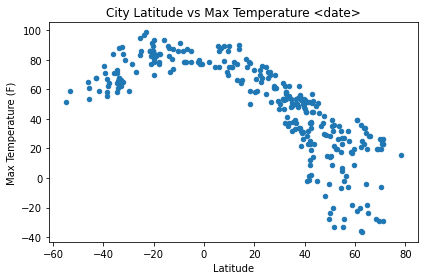

In [44]:
#### scatter plot using pandas --LATITUDE vs TEMPERATURE

cities_df.plot(kind="scatter", x='Lat', y='Max Temp')

plt.title("City Latitude vs Max Temperature <date>")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Temp_plot.png")

#plt.legend()
plt.close

# Latitude vs Humidity Plot

<function matplotlib.pyplot.close(fig=None)>

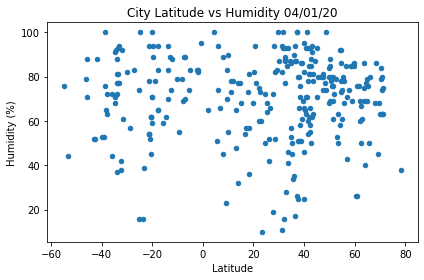

In [46]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Humidity')

# Set a Title and labels
plt.title("City Latitude vs Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

#plt.legend()
plt.close

# Latitude vs Cloudiness Plot

<function matplotlib.pyplot.close(fig=None)>

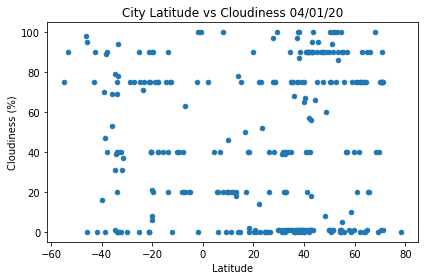

In [47]:
#### scatter plot using pandas -- Latitude vs Cloudiness

cities_df.plot(kind="scatter", x='Lat', y='Cloudiness')

# Set a Title and labels
plt.title("City Latitude vs Cloudiness " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Cloudiness_plot.png")

#plt.legend()
plt.close

# Latitude vs Wind Speed Plot

<function matplotlib.pyplot.close(fig=None)>

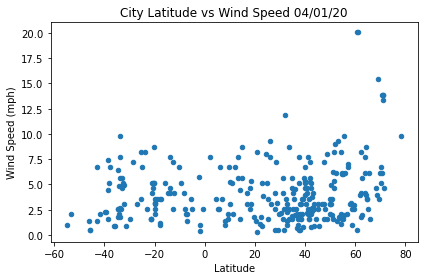

In [48]:
#### scatter plot using pandas --

cities_df.plot(kind="scatter", x='Lat', y='Wind Speed')

# Set a Title and labels
plt.title("City Latitude vs Wind Speed " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_WindSpeed_plot.png")

#plt.legend()
plt.close

# Northern Hemisphere & Southern Hemisphere

#### Northern Hemipshere:  >= 0 degrees latitude
#### Southern Hemisphere:   < 0 degrees latitude

In [49]:
nor_hem_df=cities_df[ cities_df['Lat'] >= 0]
nor_hem_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,3705,san patricio,40,US,1612760651,94,28.0170,-97.5169,60.800,4.12
1,2216,sarh,0,TD,1612760971,23,9.1429,18.3923,71.600,2.06
3,9429,georgetown,20,MY,1612761223,51,5.4112,100.3354,89.600,2.57
4,7668,kodiak,1,US,1612761103,74,57.7900,-152.4072,24.800,3.09
6,9649,zhangzhou,0,CN,1612760974,50,24.5133,117.6556,75.200,8.00
...,...,...,...,...,...,...,...,...,...,...
288,3707,cross lanes,1,US,1612761212,58,38.4204,-81.7907,21.992,1.54
289,6065,indio,1,US,1612761174,46,33.7206,-116.2156,62.600,1.54
290,5239,north bend,90,US,1612761213,81,43.4065,-124.2243,44.600,2.57
291,859,chapais,1,CA,1612761456,84,49.7834,-74.8492,-4.000,2.06


In [51]:
sou_hem_df=cities_df[ cities_df['Lat'] < 0]
sou_hem_df

,City ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,8303,ushuaia,75,AR,1612761222,76,-54.8000,-68.3000,51.800,1.03
5,2008303,busselton,94,AU,1612761224,93,-33.6500,115.3333,66.992,2.68
7,2006131,hermanus,39,ZA,1612761182,92,-34.4187,19.2345,57.992,2.59
8,2035063,kruisfontein,69,ZA,1612761226,81,-34.0033,24.7314,66.002,4.87
9,2031307,new norfolk,90,AU,1612761227,52,-42.7826,147.0587,68.000,1.34
...,...,...,...,...,...,...,...,...,...,...
285,1912,east london,40,ZA,1612761211,94,-33.0153,27.9116,66.200,5.66
292,9574,palmerston,75,AU,1612761215,74,-12.4860,130.9833,87.008,7.20
293,9527,alyangula,40,AU,1612761216,70,-13.8483,136.4192,87.800,4.63
294,7318,tiarei,40,PF,1612761217,65,-17.5333,-149.3333,84.200,3.60


In [52]:
# Latitude vs. Temperature Plot -- All Latitudes
lat=cities_df['Lat']
lat

0      28.0170
1       9.1429
2     -54.8000
3       5.4112
4      57.7900
        ...   
292   -12.4860
293   -13.8483
294   -17.5333
295    27.8964
296   -10.1667
Name: Lat, Length: 297, dtype: float64

In [53]:
# split for Northern Hemisphere & Southern Hemisphere
n_lat = nor_hem_df['Lat']
n_lat    

0      28.0170
1       9.1429
3       5.4112
4      57.7900
6      24.5133
        ...   
288    38.4204
289    33.7206
290    43.4065
291    49.7834
295    27.8964
Name: Lat, Length: 212, dtype: float64

In [54]:
# get latitude min & max for x axis
min_n_lat = n_lat.min()
min_n_lat

2.0371

In [55]:
max_n_lat = n_lat.max()
max_n_lat

78.2186

In [56]:
# split for Northern Hemisphere & Southern Hemisphere
s_lat = sou_hem_df['Lat']
s_lat  

2     -54.8000
5     -33.6500
7     -34.4187
8     -34.0033
9     -42.7826
        ...   
285   -33.0153
292   -12.4860
293   -13.8483
294   -17.5333
296   -10.1667
Name: Lat, Length: 85, dtype: float64

In [57]:
# get latitude min & max for x axis
min_s_lat = s_lat.min()
min_s_lat

-54.8

In [58]:
max_s_lat = s_lat.max()
max_s_lat

-0.7393

In [59]:
n_temp=nor_hem_df['Max Temp']
n_temp

0      60.800
1      71.600
3      89.600
4      24.800
6      75.200
        ...  
288    21.992
289    62.600
290    44.600
291    -4.000
295    62.006
Name: Max Temp, Length: 212, dtype: float64

In [60]:
# get Temperature min & max for y axis -- NORTHERN HEMISPHERE
min_n_temp = n_temp.min()
min_n_temp

-36.39999999999995

In [61]:
max_n_temp = n_temp.max()
max_n_temp

89.99600000000005

In [62]:
# get Temperature min & max for y axis -- SOUTHERN HEMISPHERE
s_temp=sou_hem_df['Max Temp']
s_temp

2      51.800
5      66.992
7      57.992
8      66.002
9      68.000
        ...  
285    66.200
292    87.008
293    87.800
294    84.200
296    86.000
Name: Max Temp, Length: 85, dtype: float64

In [63]:
# get Temperatrue min & max for y axis
min_s_temp = s_temp.min()
min_s_temp

51.8

In [64]:
max_s_temp = s_temp.max()
max_s_temp

98.6

# Linear Regression

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [66]:
# create the scatter plot - line -- Northern Hemisphere
# Dependencies

from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
temps = nor_hem_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(-0.7934726413584392, 3.5496114866676095e-47)

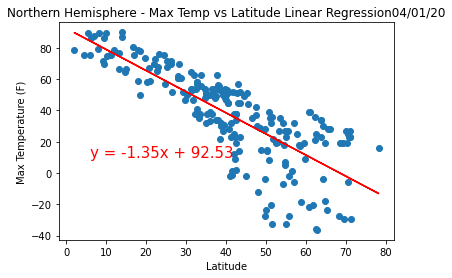

In [67]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression" + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/N_Lat_vs_Temp_with_line_plot.png")

plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [68]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
temps = sou_hem_df['Max Temp']

correlation = st.pearsonr(lats, temps)
correlation

(0.6464487031178459, 2.3508894447922508e-11)

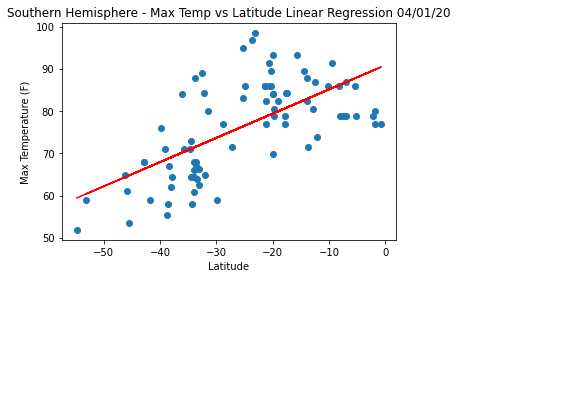

In [69]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/N_Lat_vs_Temp_with_line_plot.png")

plt.show()

#create the scatter plot for Latitude vs. Humidity Plot -- all cities

######scatter plot using pandas -- ALL CITIES

cities_df.plot(kind="scatter", x='Lat', y='Humidity')

######Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tight_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

#plt.legend()
plt.close

#temp_hum=cities_df['Humidity']
#temp_hum

#get Temperatrue min & max for y axis
#min_humidity = temp_hum.min()
#min_humidity

#max_humidity = temp_hum.max()
#max_humidity

#Create Scatter Pot -- Latitude vs. Humidity Plot

#enable matplotlib so that the correlation / regression line can be drawn over the scatter plot

%matplotlib notebook 

#----------------------------------------------
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

from scipy.stats import sem
import scipy.stats as st

#----------------------------------------------

#variables for chart data
x_data = cities_df['Lat']
y_data = cities_df['Humidity']

#----------------------------------------------

#The maximum x value for our chart will be 25
x_limit = max_lat

#List of values 
x_axis = np.arange(min_lat, x_limit, 2)

#Create a random array of data that we will use for our y values
#data = [random.random() for value in x_axis]

#Tells matplotlib to create a scatter plot
#The size of each point on our plot is determined by their x value

plt.scatter(x_data, y_data, marker="o", facecolors="blue", edgecolors="black", s=y_data, alpha=0.75)
            
#x limits of scatter plot
plt.xlim(min_lat-0.5, max_lat+0.9)   

#y limits of scatter plot
plt.ylim(min_humidity-0.1, max_humidity+10)

#Set a Title and labels
plt.title("City Latitude vs Humidity <date>")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# tigh_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()

# Save our graph and show the graph
# plt.savefig("../Images/<xyz.png")

plt.savefig("Images/Lat_vs_Humidity_plot.png")

plt.show()

#plt.close 

#### Nothern Hemisphere Humidity

In [70]:
temp_nor_hum = nor_hem_df['Humidity']
temp_nor_hum

0      94
1      23
3      51
4      74
6      50
       ..
288    58
289    46
290    81
291    84
295    19
Name: Humidity, Length: 212, dtype: int64

In [71]:
# get Temperatrue min & max for y axis
min_nor_humidity = temp_nor_hum.min()
min_nor_humidity

10

In [72]:
max_nor_humidity = temp_nor_hum.max()
max_nor_humidity

100

#### Southern Hemisphere Humidity

In [73]:
temp_sou_hum = sou_hem_df['Humidity']
temp_sou_hum

2      76
5      93
7      92
8      81
9      52
       ..
285    94
292    74
293    70
294    65
296    79
Name: Humidity, Length: 85, dtype: int64

In [74]:
# get Temperatrue min & max for y axis
min_sou_humidity = temp_sou_hum.min()
min_sou_humidity

16

In [75]:
max_sou_humidity = temp_sou_hum.max()
max_sou_humidity

100

####Humidity (%) vs. Latitude Linear Regression

##for ALL CITIES

#create the scatter plot - line
#Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = cities_df['Lat']
hums = cities_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

#Add the linear regression equation and line to plot
x_values = cities_df['Lat']
y_values = cities_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#Set a Title and labels
plt.title("City Latitude vs Humidity " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/Lat_vs_Humidity_with_line_plot.png")

plt.show()

#### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [84]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
hums = nor_hem_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(0.05787283301734969, 0.40182733254537384)

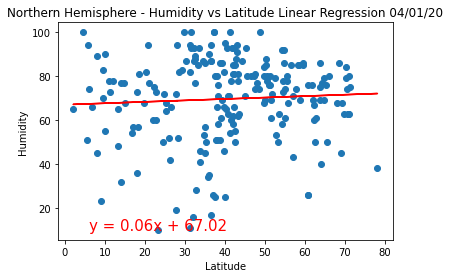

In [85]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Humidity vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("Images/N_Lat_vs_Humidity_with_line_plot.png")

plt.show()

In [78]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.05787283301734974


#### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [86]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
hums = sou_hem_df['Humidity']

correlation = st.pearsonr(lats, hums)
correlation

(0.17217580691043483, 0.11510169727085877)

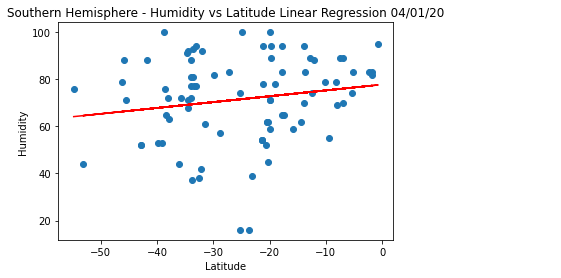

In [87]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Humidity vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
 
plt.savefig("Images/S_Lat_vs_Humidity_with_line_plot.png")

plt.show()

In [81]:
line_eq 

'y = 0.25x + 77.78'

In [82]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.1721758069104349


#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [88]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
clouds = nor_hem_df['Cloudiness']

correlation = st.pearsonr(lats, clouds)
correlation

(0.20514433500008383, 0.002688536767955857)

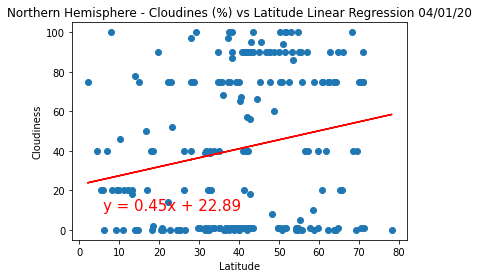

In [89]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Cloudines (%) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/N_Cloudat_vs_Humidity_with_line_plot.png")

plt.show()

In [90]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.205144335000084


#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [91]:
#create the scatter plot - line -- Southern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
clouds = sou_hem_df['Cloudiness']

correlation = st.pearsonr(lats, clouds)
correlation

(-0.07810565489644586, 0.4773798603910957)

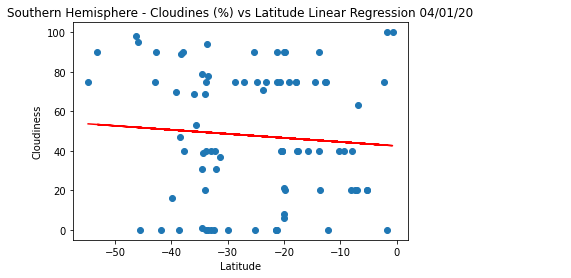

In [92]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Cloudines (%) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.savefig("Images/N_Cloud_vs_Humidity_with_line_plot.png")

plt.show()

In [93]:
print("The r-value: is: ", rvalue)

The r-value: is:  -0.07810565489644593


#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [96]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = n_lat
winds = nor_hem_df['Wind Speed']

correlation = st.pearsonr(lats, winds)
correlation

(0.2606299879470132, 0.0001235595375356977)

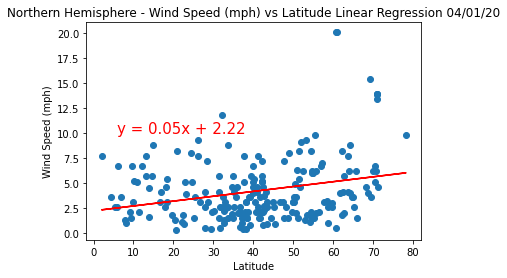

In [97]:
# Add the linear regression equation and line to plot
x_values = n_lat
y_values = nor_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/N_WindSpeed_vs_Lat_with_line_plot.png")

plt.show()

In [98]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.26062998794701314


#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [99]:
#create the scatter plot - line -- Northern Hemisphere
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from scipy.stats import sem

import numpy as np
import pandas as pd
import scipy.stats as st

lats = s_lat
winds = sou_hem_df['Wind Speed']

correlation = st.pearsonr(lats, winds)
correlation

(0.06734832068129801, 0.5402577977074973)

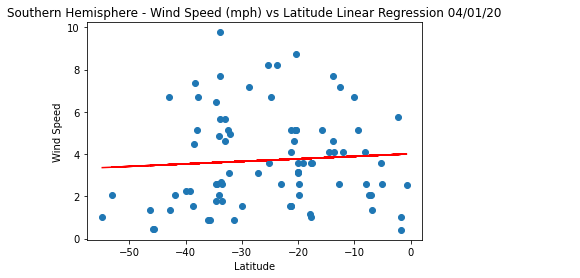

In [100]:
# Add the linear regression equation and line to plot
x_values = s_lat
y_values = sou_hem_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Set a Title and labels
plt.title("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression " + date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("Images/N_WindSpeed_vs_Lat_with_line_plot.png")

plt.show()

In [101]:
print("The r-value: is: ", rvalue)

The r-value: is:  0.06734832068129798
